In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [4]:
df_large = pd.read_csv('/workspaces/ECON-424/Predic_2/424_F2025_PC2_large_train_data_v1.csv')
df_small = pd.read_csv('/workspaces/ECON-424/Predic_2/424_F2025_PC2_small_train_data_v1.csv')
df_medium = pd.read_csv('/workspaces/ECON-424/Predic_2/424_F2025_PC2_medium_train_data_v1.csv')

df_test = pd.read_csv('/workspaces/ECON-424/Predic_2/424_F2025_PC2_test_without_response_variable_data_v1.csv')


In [ ]:
df_small

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,year
0,16991.0,17,3600,25,283,47706,2018
1,16950.0,15,5000,21,360,67250,2014
2,11342.0,16,4000,22,261,129241,2013
3,13488.0,29,1800,37,124,39854,2018
4,18994.0,28,2000,37,147,30297,2017
...,...,...,...,...,...,...,...
29995,17862.0,22,2000,30,252,51220,2017
29996,14990.0,17,3600,25,283,79546,2018
29997,14799.0,23,2000,30,164,48721,2017
29998,13950.0,17,3500,25,365,108112,2014


Text(0.5, 1.0, 'Distribution Price')

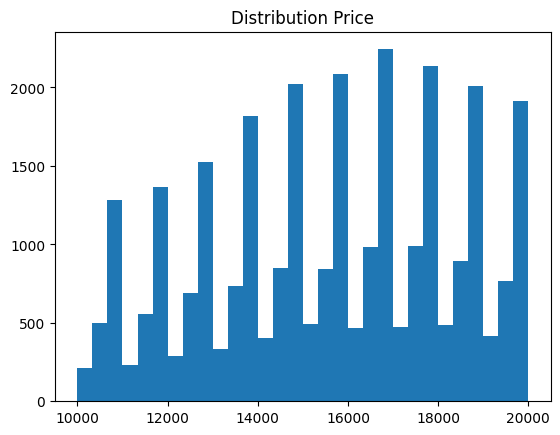

In [ ]:
plt.hist(df_small['price'], bins = 30)
plt.title("Distribution Price")

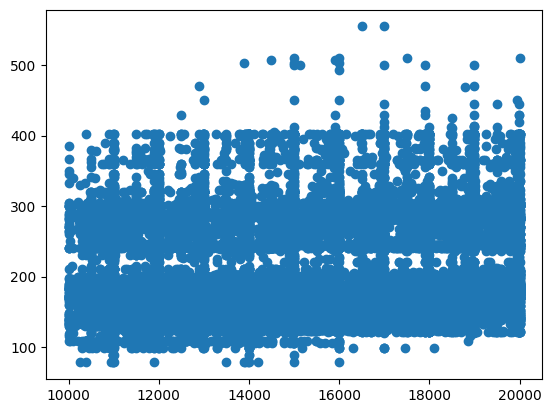

In [ ]:
plt.scatter(df_small['price'],df_small['horsepower'])

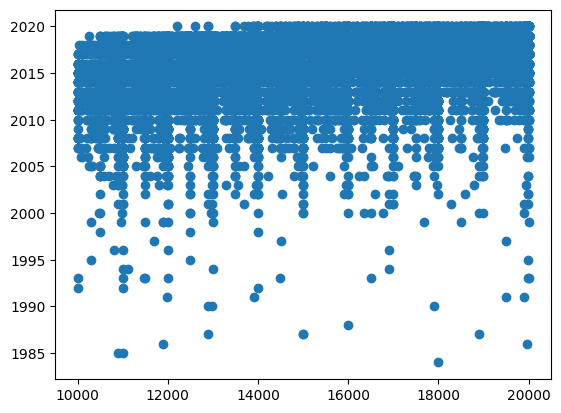

In [ ]:
plt.scatter(df_small['price'], df_small['year'])

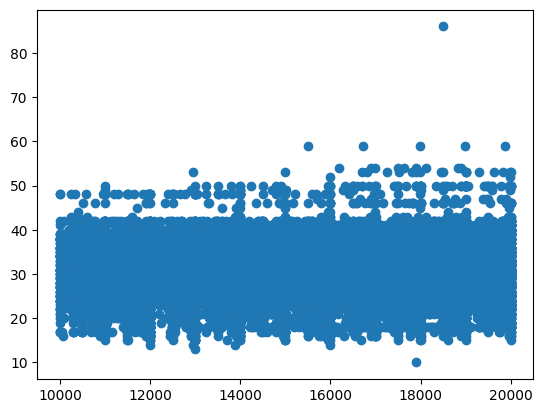

In [ ]:
plt.scatter(df_small['price'], df_small['highway_fuel_economy'])

In [ ]:
df_small.describe()

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,year
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15665.107960,23.563467,2545.056667,31.186600,205.702933,59647.691233,2015.822067
std,2713.340955,6.174699,973.024044,6.187675,64.686119,36816.818992,2.990157
min,10000.000000,9.000000,700.000000,10.000000,78.000000,10003.000000,1984.000000
25%,13506.750000,19.000000,2000.000000,27.000000,160.000000,31954.000000,2014.000000
50%,15969.000000,23.000000,2400.000000,31.000000,182.000000,47873.500000,2017.000000
75%,17988.000000,27.000000,3000.000000,36.000000,250.000000,81717.000000,2018.000000
max,19999.000000,81.000000,7400.000000,86.000000,555.000000,388395.000000,2020.000000


In [ ]:
df_combined = pd.concat([df_small, df_large,df_medium])

In [ ]:
df_medium['price']

0        31409.0
1        33000.0
2        31900.0
3        32980.0
4        33999.0
          ...   
49995    47500.0
49996    36995.0
49997    39499.0
49998    35999.0
49999    38850.0
Name: price, Length: 50000, dtype: float64

In [ ]:
df_medium['mileage'] = df_medium['mileage']/1000

In [ ]:
plt.scatter(df_med_alt['year'],df_med_alt['mileage'])

NameError: name 'df_med_alt' is not defined

In [ ]:
df_med_alt = df_medium.drop(25548)

In [ ]:
df_combined['price'] = np.log(df_combined['price'])

In [ ]:
x_vals = df_combined.drop('price',axis=1)
y_vals = df_combined['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_vals,y_vals,test_size=0.13)

In [ ]:
model_tree = DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import r2_score

R2 of the model is: 0.3971462537022812
[ 9.47905772e-03  2.07634931e-05 -1.20808107e-02  1.03887385e-03
 -2.46765018e-06  2.57369690e-02  7.03740181e-02  3.61979882e-03]
Model Score is: 0.5681038532400342     
 R2 of the model is: 0.566248136785005


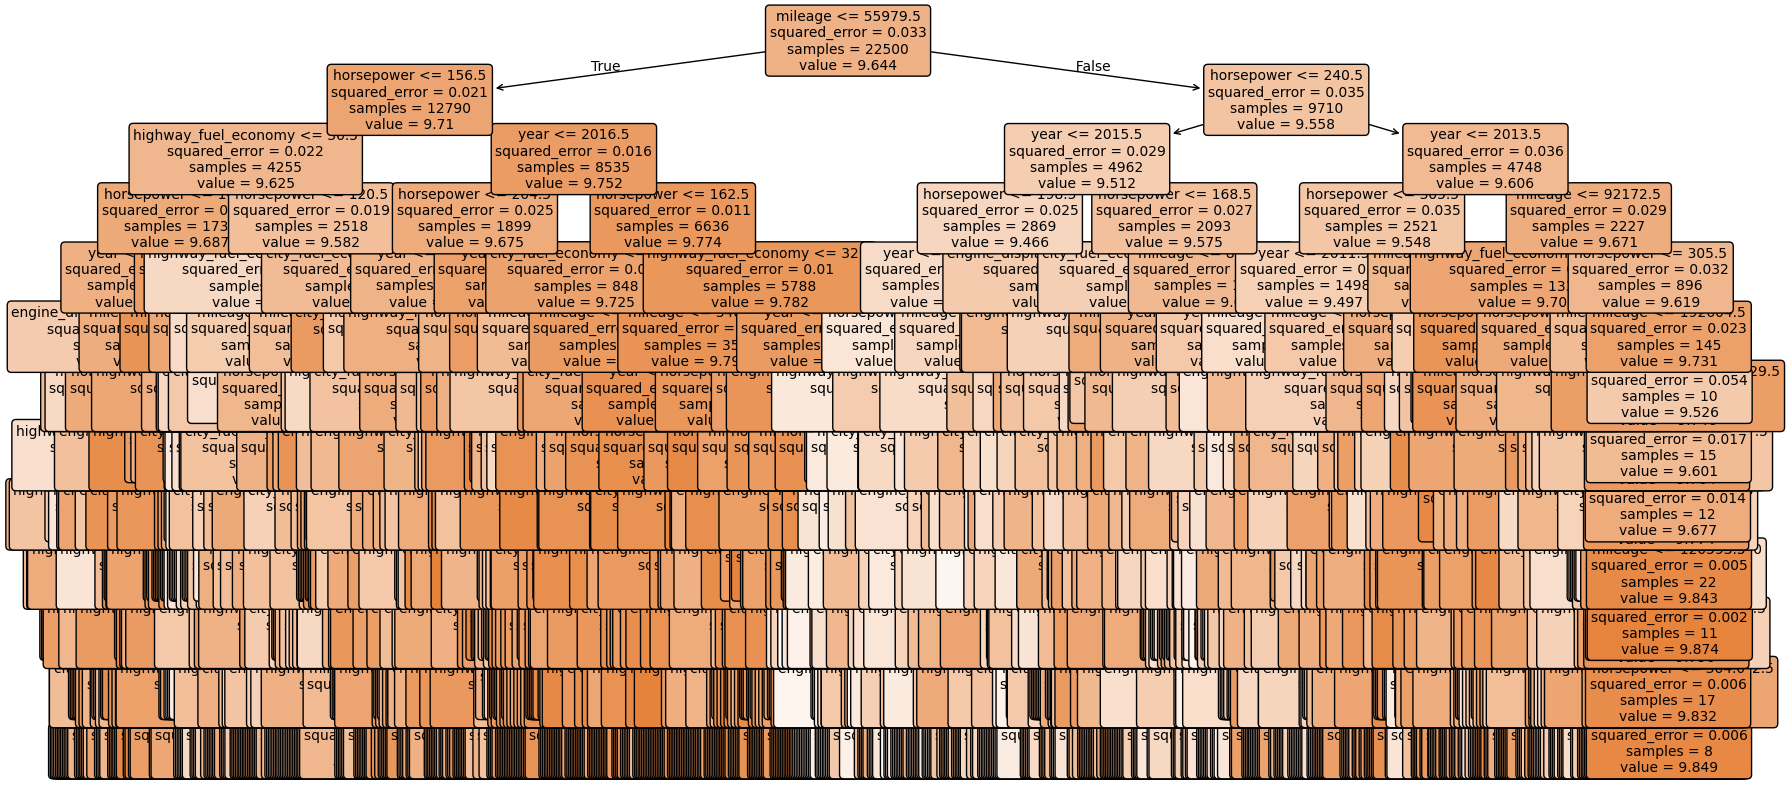

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from scipy.stats import randint
import numpy as np

df_small = pd.read_csv('/workspaces/ECON-424/Predic_2/424_F2025_PC2_small_train_data_v1.csv')


# for column in df_small.drop('price', axis=1).columns:
#     plt.figure()
#     plt.scatter(df_small['price'], df_small[column])
#     plt.xlabel('price')
#     plt.ylabel(column)
#     plt.title(f'Scatter plot of Price vs {column}')
#     plt.savefig(f"scatter_small_{column}.png")

 
def visualize_decision_tree(model, feature_names=None, class_names=None, figsize=(20, 10), show=True):
    """
    Visualizes a decision tree model, displaying key information about each node, such as Gini Impurity, class distribution, and feature splits.
 
    Parameters:
    - model: The trained decision tree model (e.g., DecisionTreeClassifier or DecisionTreeRegressor).
    - feature_names: List of feature names. Default is None, which uses the feature index numbers.
    - class_names: List of class names (only relevant for classification problems). Default is None.
    - figsize: Tuple specifying the size of the plot. Default is (20, 10).
    - show: Boolean to decide if the plot should be shown. Default is True.
    """
    plt.figure(figsize=figsize)
 
    # Plot the tree
    plot_tree(
        model, 
        filled=True,  # Color nodes based on class
        feature_names=feature_names,  # Label the feature names
        class_names=class_names,  # Label the class names (for classification)
        fontsize=10,  # Font size for text
        impurity=True,  # Display Gini impurity at each node
        proportion=False,  # Do not normalize sample counts
        rounded=True  # Rounded edges for the nodes
    )
    plt.show()
 

## cleaning data
df_combined = pd.concat([df_small])
df_combined['price'] = np.log(df_combined['price'])

df_combined['is_old'] = (df_combined['year'] < 2010).astype(int)
df_combined ['is_high_mileage'] = (df_combined['mileage'] > 100000).astype(int)

x_vals = df_combined.drop('price',axis=1)
y_vals = df_combined['price']

x_train, x_test, y_train, y_test = \
    train_test_split(x_vals,y_vals,test_size=0.25)

## Models

##  Linear Regression
model_lin = LinearRegression() 
model_lin.fit(x_train,y_train)
predic_lin = model_lin.predict(x_test)
r2_lin = r2_score(y_test,predic_lin)
print('R2 of the model is: {0}'.format(r2_lin))    

print(model_lin.coef_)


param_distributions = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}
model_tree = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=10,
    scoring='r2',
    random_state=42
)
model_tree.fit(x_train,y_train)
predic_tree = model_tree.predict(x_test)
r2_tree = r2_score(y_test,predic_tree)
print('Model Score is: {0} \
    \n R2 of the model is: {1}'.format(model_tree.best_score_,r2_tree))

best_tree = model_tree.best_estimator_

visualize_decision_tree(best_tree, feature_names=x_train.columns, figsize=(20,10))


In [ ]:
prediction = model_tree.predict(x_test)

In [ ]:
r2 = r2_score(y_test, prediction)


In [ ]:
r2

0.9088925427752815

In [ ]:
prediction


array([ 9.3051959 , 11.19814622,  9.6283926 , ..., 10.53608823,
       10.49121866, 10.51257355], shape=(23400,))

In [ ]:
df_combined.head()

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,year
0,9.740439,17,3600,25,283,47706,2018
1,9.738023,15,5000,21,360,67250,2014
2,9.336268,16,4000,22,261,129241,2013
3,9.509556,29,1800,37,124,39854,2018
4,9.851878,28,2000,37,147,30297,2017


In [ ]:
df_medium['mileage']

0        26.054
1        45.804
2        24.653
3        41.538
4        62.268
          ...  
49995    37.115
49996    48.918
49997    26.102
49998    40.542
49999    31.022
Name: mileage, Length: 50000, dtype: float64

In [ ]:
from sklearn.linear_model import Ridge

# alpha is the regularization strength. A larger alpha means more penalty.
ridge_model = Ridge(alpha=0.1) 

# Train the model
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
predic_ridge = ridge_model.predict(x_test)

In [ ]:
from sklearn.linear_model import Lasso

# A larger alpha means more coefficients are likely to become zero.
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy.stats import randint
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [7]:
#df = df_small.copy()
df= df_small.copy()

In [8]:
df = df[df['mileage']<= 225000]
df = df[df['horsepower']<= 400]
df = df[df['city_fuel_economy']<=37]
df = df[df['engine_displacement']<= 6000]
df = df[df['highway_fuel_economy']<=40]
df = df[df['year']>=2000]

df['mileage/year'] = df['mileage']/(df['year'])
df['mileage'] = np.log(df['mileage'])
df['price']=np.log(df['price'])


df_small['year']= 2025 - df_small['year']
bins = [0, 1500, 2500, 4000, 6000]
labels = ['small', 'medium', 'large', 'x-large']
df['engine_size_cat'] = pd.cut(df['engine_displacement'], bins=bins, labels=labels)

df = pd.get_dummies(df, columns=['engine_size_cat'])
df

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,year,mileage/year,engine_size_cat_small,engine_size_cat_medium,engine_size_cat_large,engine_size_cat_x-large
0,9.740439,17,3600,25,283,10.772812,2018,23.640238,False,False,True,False
1,9.738023,15,5000,21,360,11.116172,2014,33.391261,False,False,False,True
2,9.336268,16,4000,22,261,11.769434,2013,64.203179,False,False,True,False
3,9.509556,29,1800,37,124,10.592978,2018,19.749257,False,True,False,False
4,9.851878,28,2000,37,147,10.318804,2017,15.020823,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,9.790431,22,2000,30,252,10.843885,2017,25.394150,False,True,False,False
29996,9.615139,17,3600,25,283,11.284091,2018,39.418236,False,False,True,False
29997,9.602315,23,2000,30,164,10.793865,2017,24.155181,False,True,False,False
29998,9.543235,17,3500,25,365,11.590923,2014,53.680238,False,False,True,False


(array([1.200e+01, 7.200e+01, 0.000e+00, 1.554e+03, 1.338e+03, 9.020e+02,
        2.324e+03, 5.958e+03, 0.000e+00, 4.364e+03, 4.184e+03, 6.700e+01,
        1.000e+00, 4.440e+02, 3.710e+02, 2.192e+03, 2.929e+03, 9.500e+01,
        2.460e+02, 1.400e+01, 8.100e+01, 0.000e+00, 1.550e+02, 2.800e+01,
        1.430e+02, 0.000e+00, 4.410e+02, 9.500e+01, 2.830e+02, 8.700e+01]),
 array([ 700.        ,  876.66666667, 1053.33333333, 1230.        ,
        1406.66666667, 1583.33333333, 1760.        , 1936.66666667,
        2113.33333333, 2290.        , 2466.66666667, 2643.33333333,
        2820.        , 2996.66666667, 3173.33333333, 3350.        ,
        3526.66666667, 3703.33333333, 3880.        , 4056.66666667,
        4233.33333333, 4410.        , 4586.66666667, 4763.33333333,
        4940.        , 5116.66666667, 5293.33333333, 5470.        ,
        5646.66666667, 5823.33333333, 6000.        ]),
 <BarContainer object of 30 artists>)

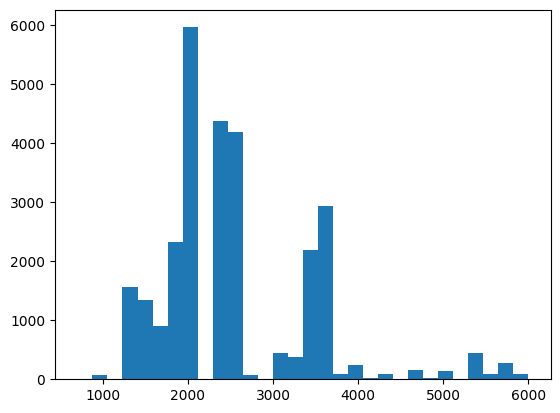

In [9]:
plt.hist(df['engine_displacement'], bins = 30)

In [10]:
df

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,year,mileage/year,engine_size_cat_small,engine_size_cat_medium,engine_size_cat_large,engine_size_cat_x-large
0,9.740439,17,3600,25,283,10.772812,2018,23.640238,False,False,True,False
1,9.738023,15,5000,21,360,11.116172,2014,33.391261,False,False,False,True
2,9.336268,16,4000,22,261,11.769434,2013,64.203179,False,False,True,False
3,9.509556,29,1800,37,124,10.592978,2018,19.749257,False,True,False,False
4,9.851878,28,2000,37,147,10.318804,2017,15.020823,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,9.790431,22,2000,30,252,10.843885,2017,25.394150,False,True,False,False
29996,9.615139,17,3600,25,283,11.284091,2018,39.418236,False,False,True,False
29997,9.602315,23,2000,30,164,10.793865,2017,24.155181,False,True,False,False
29998,9.543235,17,3500,25,365,11.590923,2014,53.680238,False,False,True,False


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=37))
])
param_distributions = {
    'model__max_depth': randint(1, 20),
    'model__min_samples_split': randint(2, 25),
    'model__min_samples_leaf': randint(1, 15)
}
model_tree_2 = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=37,
    n_jobs=-1
)

In [ ]:
model_tree_2.fit(df.drop('price',axis=1), df['price'])
print(model_tree_2.best_params_)
print(model_tree_2.best_score_)

{'model__max_depth': 14, 'model__min_samples_leaf': 13, 'model__min_samples_split': 12}
0.5741621391778383


In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.20, random_state=37)

In [20]:
  
param_distributions = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2,25),
    'min_samples_leaf': randint(1, 15)
}
model_tree = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=37),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=37,
    n_jobs=-1
)
model_tree.fit(df.drop('price',axis=1),df['price'])
#r2_tree = r2_score(y_test,model_tree.predict(x_test))
print('Model Score is: {0} \n Best Params : {1}'  .format(model_tree.best_score_, model_tree.best_params_))
#print(r2_tree)

Model Score is: 0.5861012112724305 
 Best Params : {'max_depth': 16, 'min_samples_leaf': 13, 'min_samples_split': 11}
